In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/1512-benchmark_dataloader")

In [3]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers"]

In [4]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="*dataloader*")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3156/3156 [00:19<00:00, 159.02it/s]


In [5]:
df_dataloader_zeroworkers=df_dataloader[df_dataloader["num_workers"]==1]

In [6]:
print(df_dataloader_zeroworkers.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 1, 1), ('s3', 2, 1), ('s3', 4, 1), ('s3', 8, 1), ('s3', 16, 1), ('s3', 32, 1), ('scratch', 1, 1), ('scratch', 2, 1), ('scratch', 4, 1), ('scratch', 8, 1), ('scratch', 16, 1), ('scratch', 32, 1)])


In [7]:
s3_dataset = df_dataloader[df_dataloader["dataset"]=="s3"]
scratch_dataset = df_dataloader[df_dataloader["dataset"]=="scratch"]

In [8]:
display(get_thread_stats(s3_dataset,group_by=group_by_dataloader))
display(get_thread_stats(scratch_dataset,group_by=group_by_dataloader))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139626932807424       1.639572e+09     1.639572e+09             71.473956   
139626941200128       1.639572e+09     1.639572e+09            115.832931   
139626949592832       1.639572e+09     1.639572e+09             42.379841   
139627471427328       1.639572e+09     1.639572e+09             24.339083   
139627513374464       1.639572e+09     1.639572e+09              6.409917   
...                            ...              ...                   ...   
140692519671552       1.639572e+09     1.639572e+09             34.653670   
140692561618688       1.639572e+09     1.639572e+09             35.370844   
140692603565824       1.639572e+09     1.639572e+09             55.992985   
140692645512960       1.639572e+09     1.639572e+09             40.596981   
140692729407232       1.639572e+09     1.639572e+09             18.130094   

                dataset  num_fetch_workers  num_workers  elapsed_thread  \
threading_ident                                                           
139626932807424      s3                  2            8       13.964759   
139626941200128      s3                  2            8       16.561990   
139626949592832      s3                  2            8       10.446011   
139627471427328      s3                  2            8       12.693544   
139627513374464      s3                  2            8        3.209927   
...                 ...                ...          ...             ...   
140692519671552      s3                  2            4       15.017874   
140692561618688      s3                  2            4       17.460041   
140692603565824      s3                  2            4       20.565441   
140692645512960      s3                  2            4       16.638823   
140692729407232      s3                  2            4       10.323088   

                 elapsed_processing  
threading_ident                      
139626932807424            5.118166  
139626941200128            6.993902  
139626949592832            4.057036  
139627471427328            1.917438  
139627513374464            1.996904  
...                             ...  
140692519671552            2.307495  
140692561618688            2.025817  
140692603565824            2.722674  
140692645512960            2.439895  
140692729407232            1.756266  

[2864 rows x 8 columns]

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139635410409216       1.639573e+09     1.639573e+09             12.013846   
139635418801920       1.639573e+09     1.639573e+09              9.894314   
139635427194624       1.639573e+09     1.639573e+09              0.804982   
139635435587328       1.639573e+09     1.639573e+09              0.793040   
139635949029120       1.639573e+09     1.639573e+09              2.216576   
...                            ...              ...                   ...   
140705897584384       1.639573e+09     1.639573e+09              1.566539   
140705904584448       1.639573e+09     1.639573e+09              0.726954   
140705904846592       1.639573e+09     1.639573e+09              1.124008   
140705912977152       1.639573e+09     1.639573e+09              0.710869   
140705913239296       1.639573e+09     1.639573e+09              1.640955   

                 dataset  num_fetch_workers  num_workers  elapsed_thread  \
threading_ident                                                            
139635410409216  scratch                 16            4        3.852992   
139635418801920  scratch                 16            4        3.924998   
139635427194624  scratch                 16            4        0.192882   
139635435587328  scratch                 16            4        0.187676   
139635949029120  scratch                 16            4        2.448743   
...                  ...                ...          ...             ...   
140705897584384  scratch                 16            8        1.304347   
140705904584448  scratch                 16            8        0.206462   
140705904846592  scratch                 16            8        0.400866   
140705912977152  scratch                 16            8        0.198452   
140705913239296  scratch                 16            8        1.277628   

                 elapsed_processing  
threading_ident                      
139635410409216            3.118057  
139635418801920            2.520846  
139635427194624            4.173454  
139635435587328            4.225572  
139635949029120            0.905189  
...                             ...  
140705897584384            1.201014  
140705904584448            3.521006  
140705904846592            2.803952  
140705912977152            3.582070  
140705913239296            1.284376  

[2184 rows x 8 columns]

In [9]:
samples = 32*40
print(samples)

1280


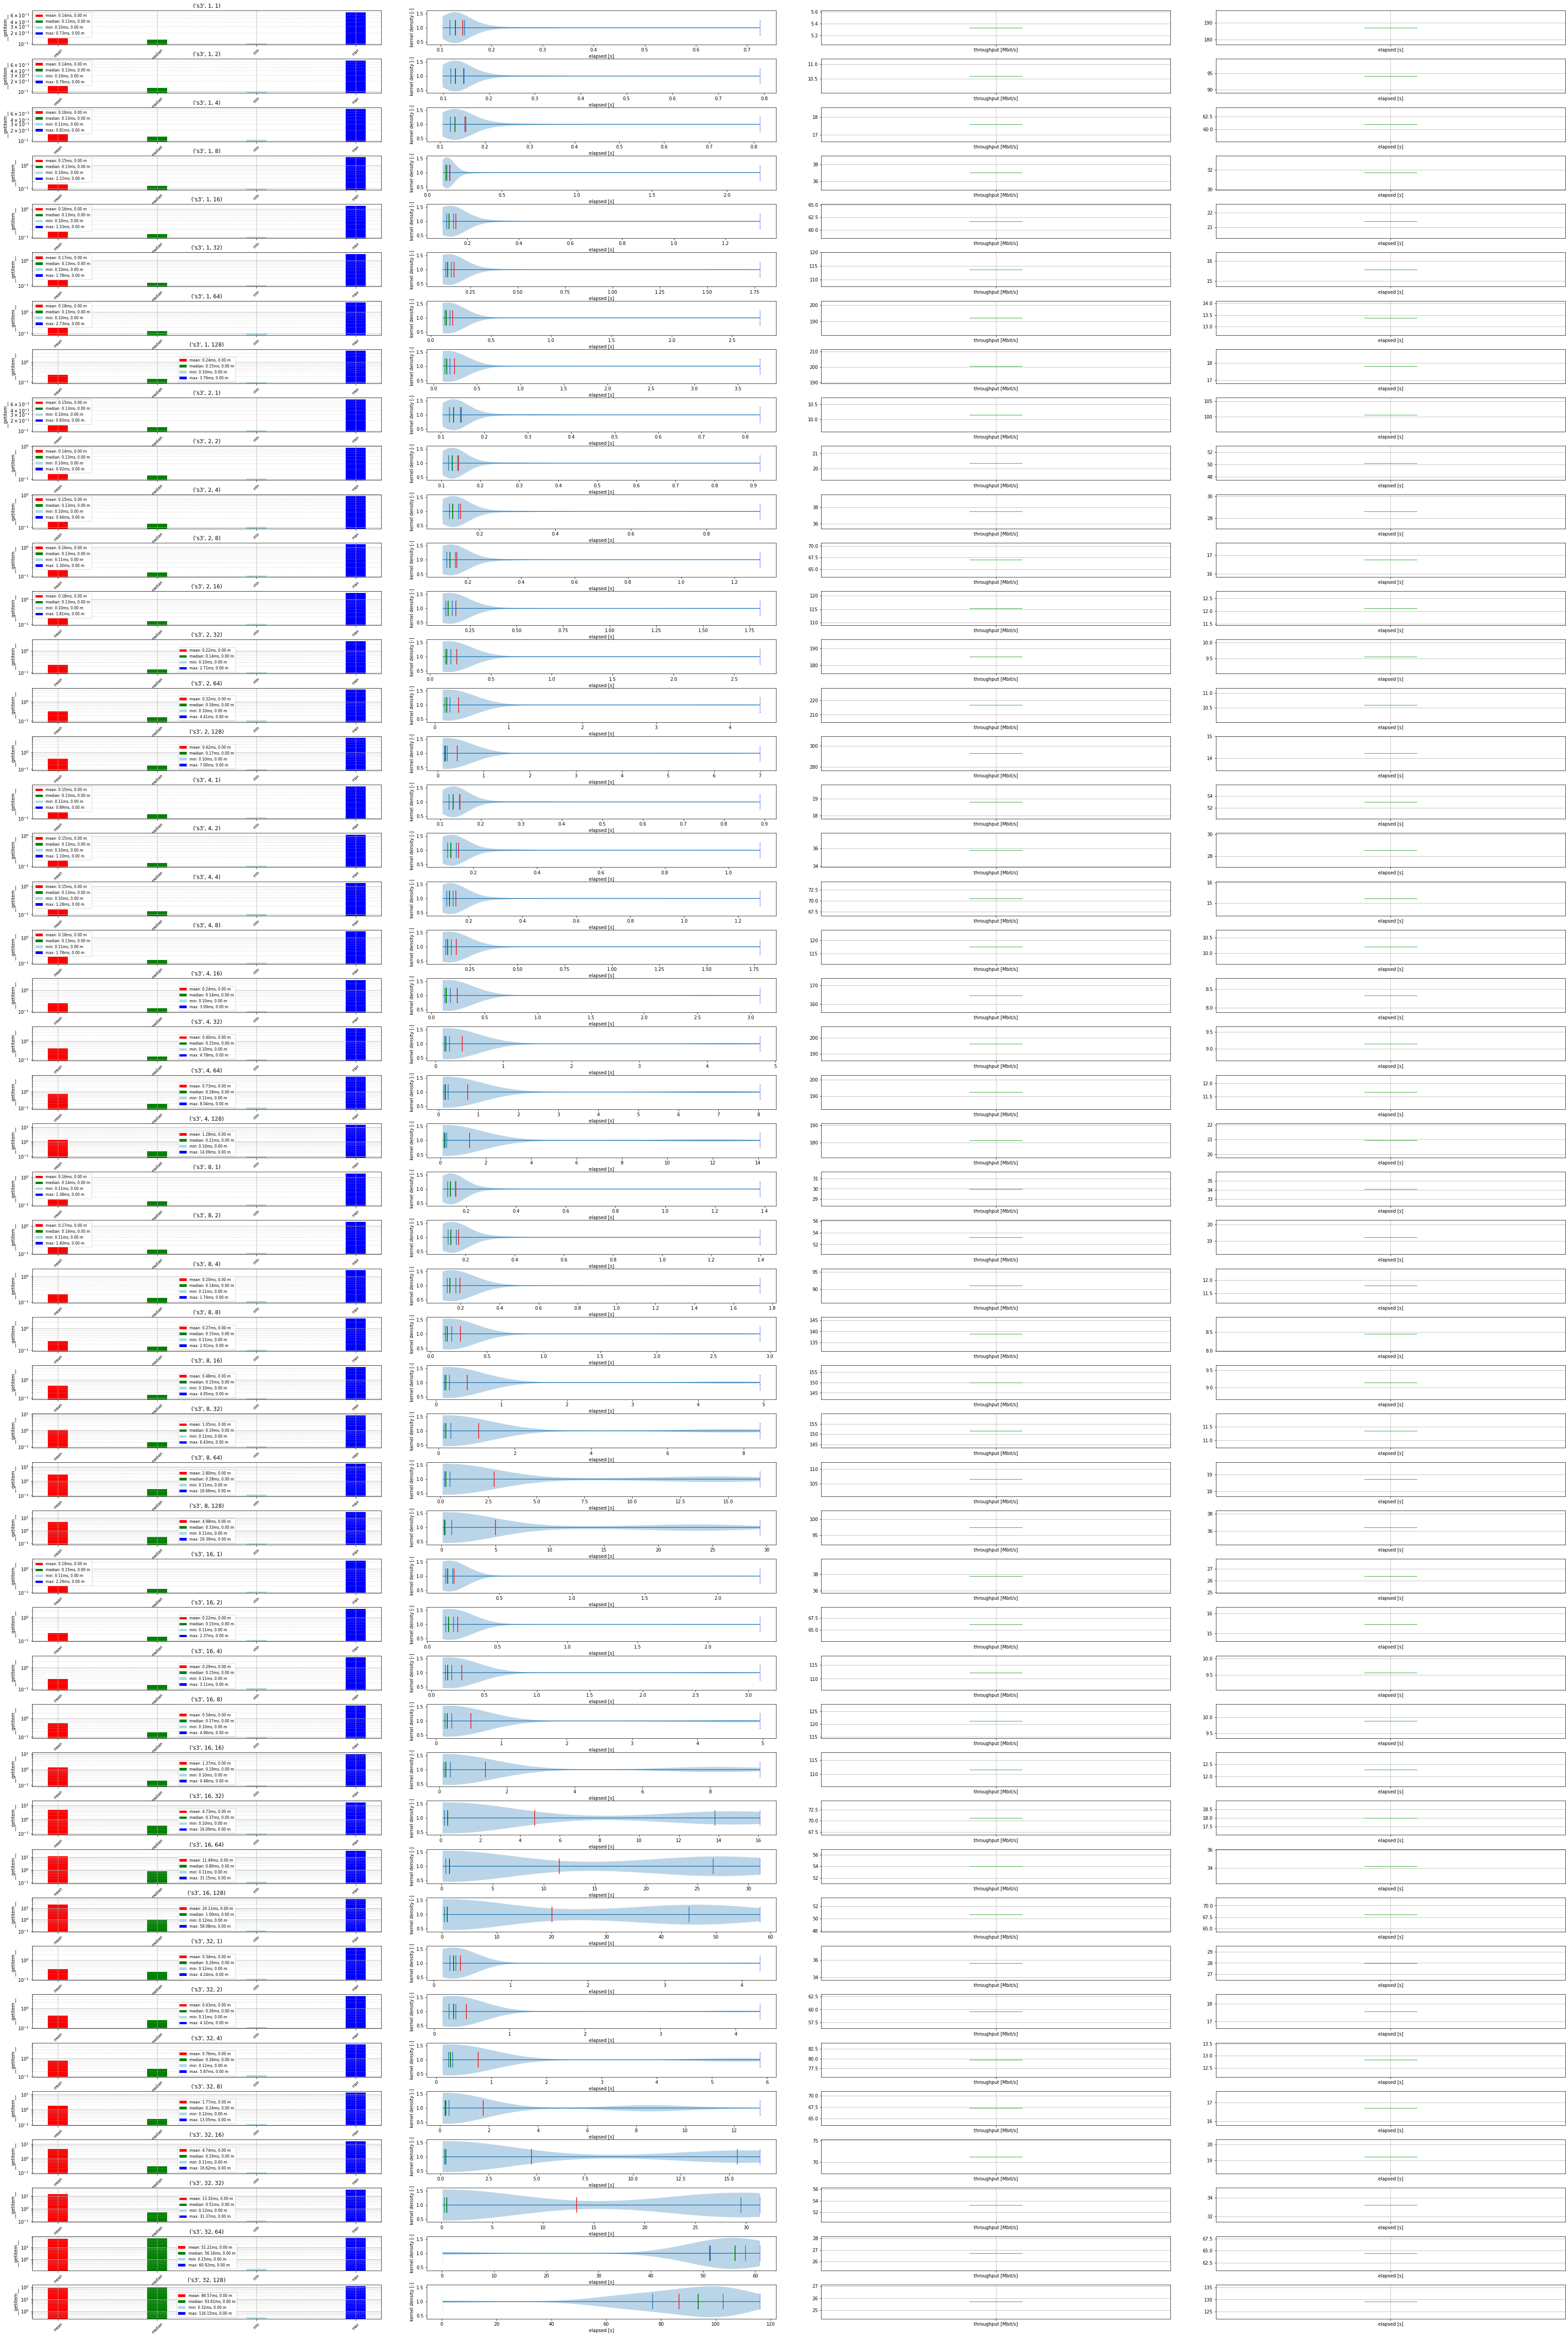

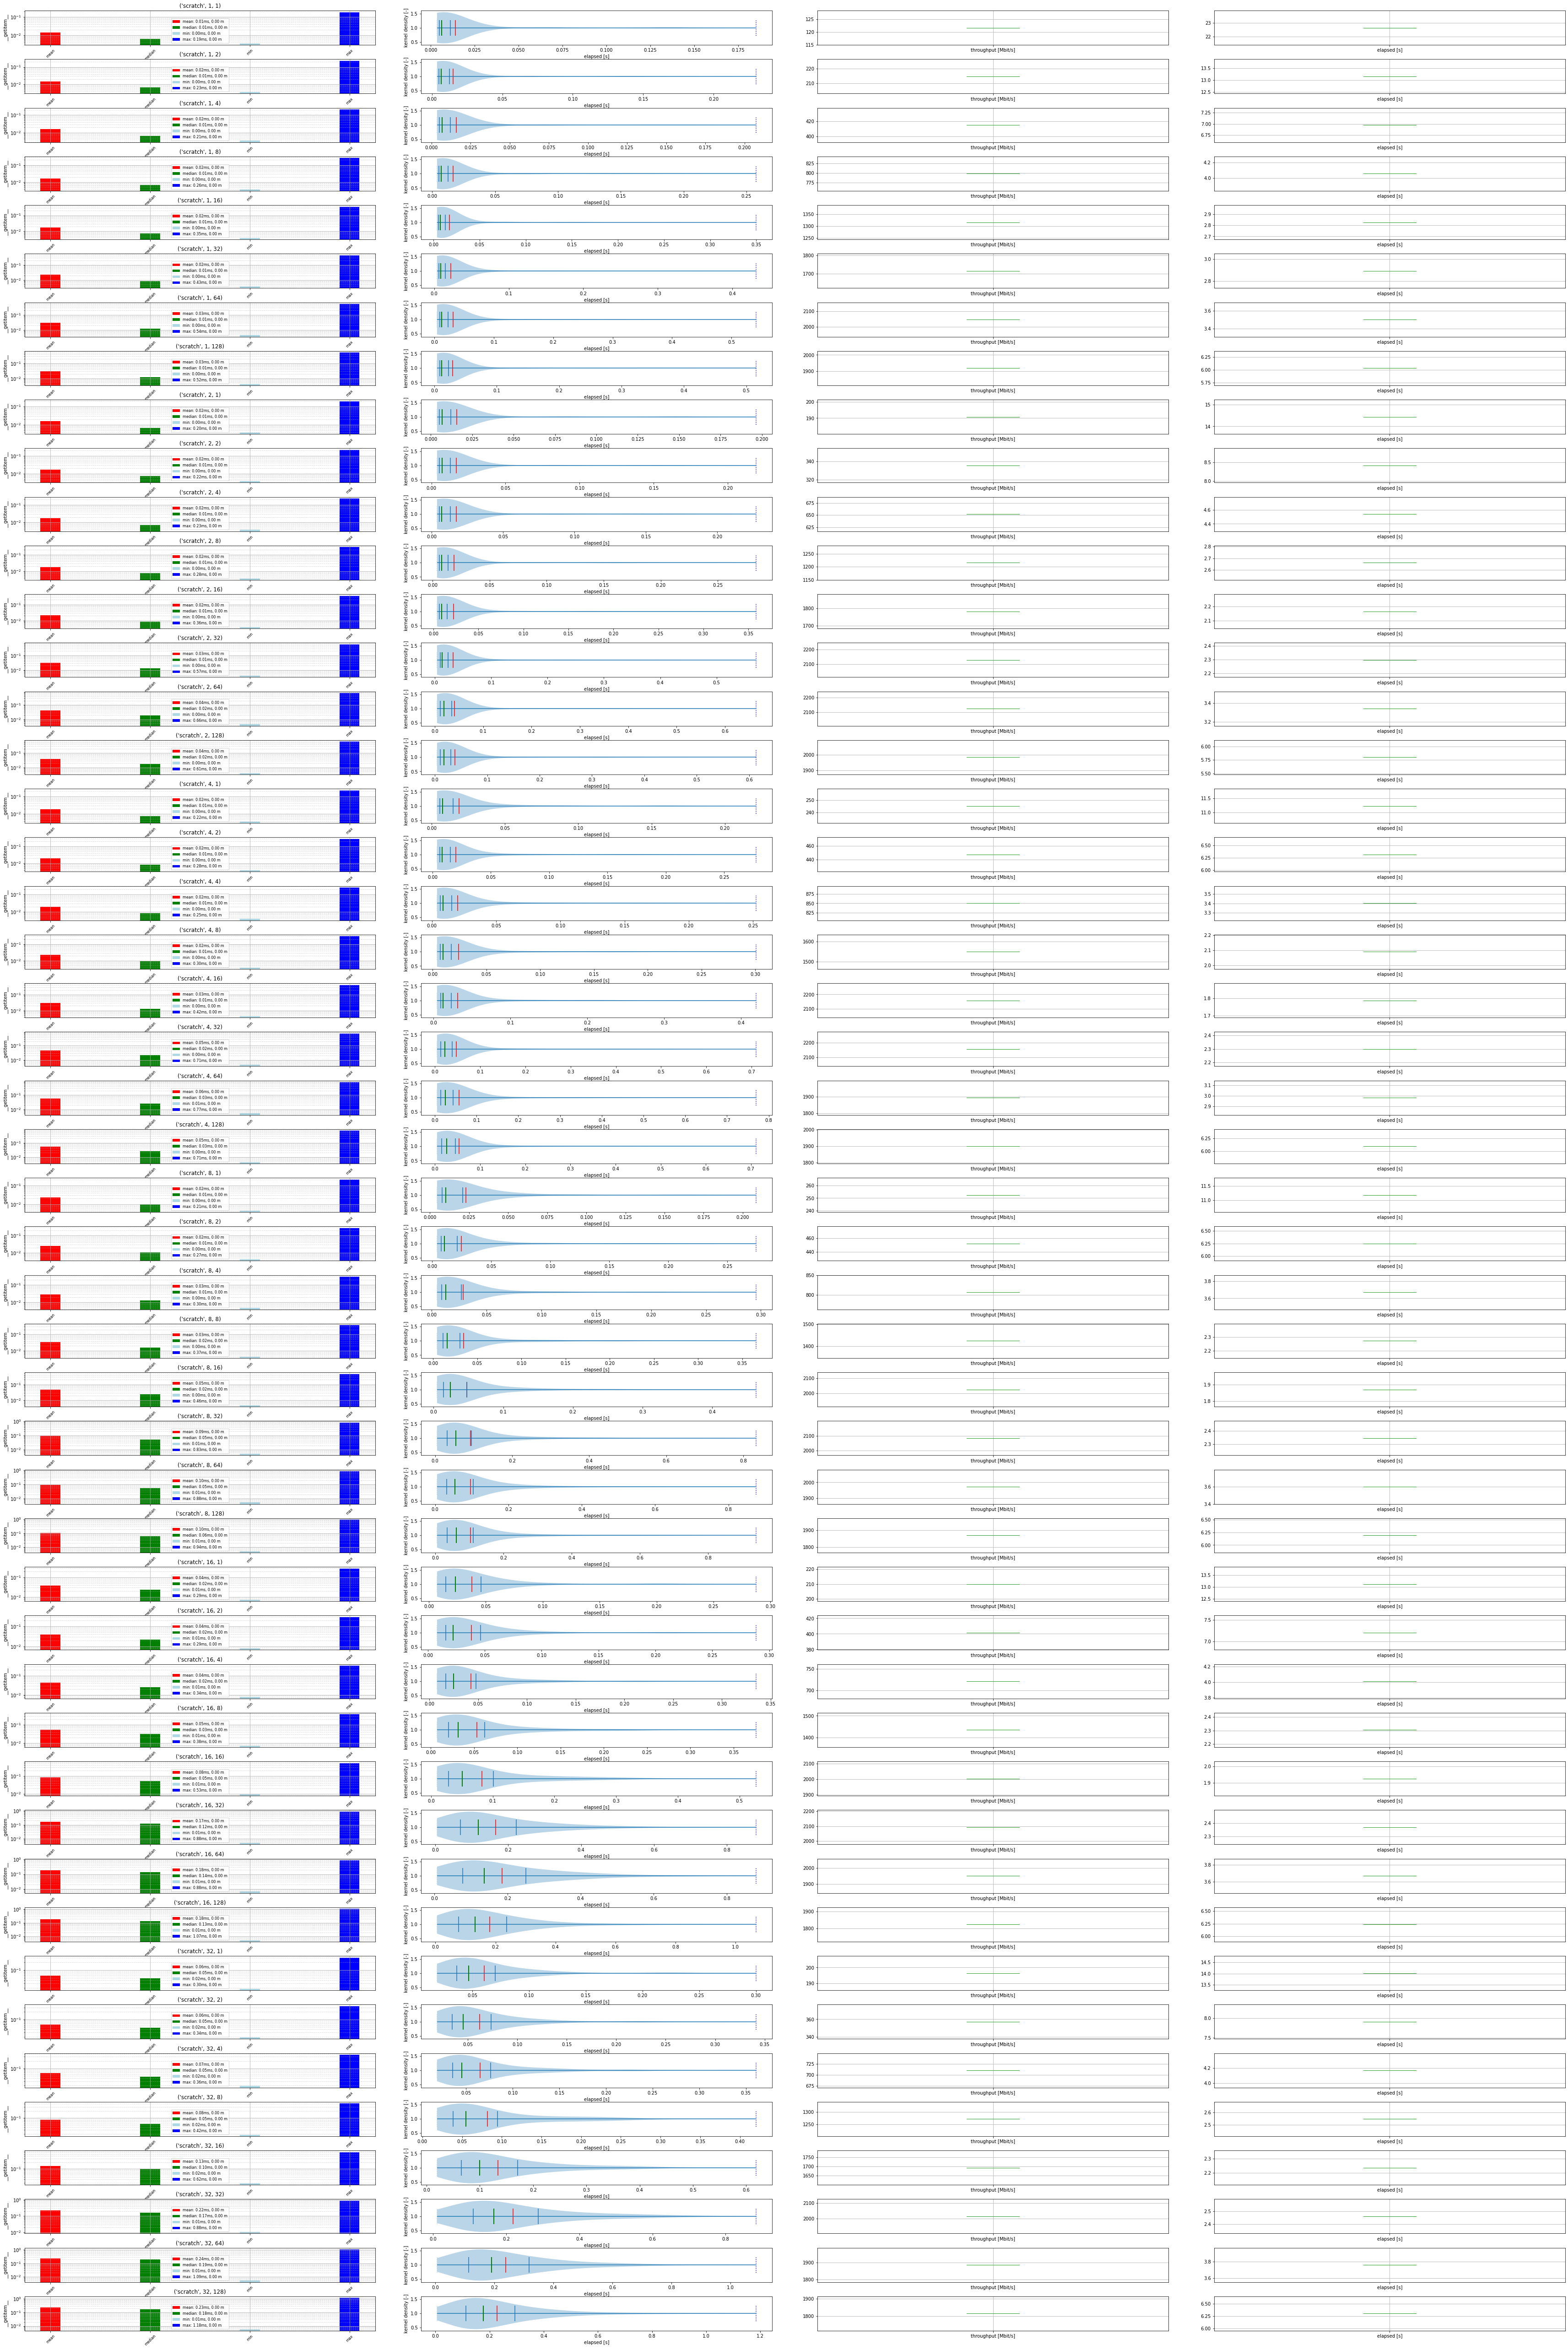

In [10]:
plot_all(s3_dataset, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)
plot_all(scratch_dataset, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)

In [11]:
# Sanity check function

In [12]:
r = pd.DataFrame()
df_for_function_name = df_dataloader[df_dataloader["function_name"] == "__getitem__"].drop_duplicates(subset=['time_start', 'time_end'], keep="first", inplace=False) 

Mbps = []
MBps = []
throughputs = []
imgs = []
dl_total = []
runs = []
results = pd.DataFrame()
runtimes = []
fetchers = []
workers = []
ids = []
storages = []
unique_runs = np.unique(df_for_function_name["run"])
subfolder = ""
for run in sorted(unique_runs):
    _id = run.split("_")[0]
    _storage = run.split("_")[3]
    _workers = run.split("_")[5]
    _fetchers = run.split("_")[6]
    with (output_base_folder / subfolder / run / "metadata.json").open() as f:
        metadata = json.load(f)

    runtime = max(df_for_function_name[df_for_function_name["run"]==run]["time_end"]) - min(df_for_function_name[df_for_function_name["run"]==run]["time_start"])
    runtimes.append(runtime)

    # we log bytes! -> b.getbuffer().nbytes or os.path.getsize
    total_images = len(df_for_function_name[(df_for_function_name["run"]==run) & (df_for_function_name["function_name"]=="__getitem__")]["len"])
    total_downloaded_bytes = df_for_function_name[(df_for_function_name["run"]==run) & (df_for_function_name["function_name"]=="__getitem__")]["len"].sum()
    total_downloaded_bits = total_downloaded_bytes * 8
    total_downloaded_Mbits = total_downloaded_bits / (1024*1024)
    total_downloaded_MBytes = total_downloaded_bytes / (1024*1024)
    # dl_byte_ps = total_downloaded_bytes / runtime

    throughputs.append(total_images / runtime)
    imgs.append(total_images)
    runs.append(run)
    fetchers.append(_fetchers)
    workers.append(_workers)
    ids.append(_id)
    storages.append(_storage)

    Mbps.append(total_downloaded_Mbits / runtime)            # bits (b)
    MBps.append(total_downloaded_MBytes / runtime)           # bytes (B)
    dl_total.append(total_downloaded_MBytes)                 # downloaded (MB)

results["ids"] = ids
results["storage"] = storages
results["workers"] = workers
results["fetchers"] = fetchers
results["throughput"] = throughputs
results["runtime"] = runtimes
results["run"] = runs
results["dl_MB"] = dl_total
results["imgs"] = imgs 
results["Mbit/s"] = Mbps
results["MB/s"] = MBps
results.sort_values(["runtime"], ascending=True)
pd.set_option('display.max_rows', None)  
display(results.drop(columns="run"))    

ids  storage workers fetchers   throughput     runtime  \
0   20211215f132420       s3       1        1     6.839850  187.138593   
1   20211215f132729       s3       2        1    13.593254   94.164356   
2   20211215f132905       s3       4        1    22.564037   60.981996   
3   20211215f133008       s3       8        1    47.469440   31.683542   
4   20211215f133042       s3      16        1    79.220097   21.408709   
5   20211215f133105       s3      32        1   145.929220   15.569192   
6   20211215f133123       s3      64        1   246.471513   13.372742   
7   20211215f133138       s3     128        1   257.023501   17.803819   
8   20211215f133158       s3       1        2    13.033925  100.660389   
9   20211215f133341       s3       2        2    26.119373   50.230914   
10  20211215f133433       s3       4        2    48.104546   28.604365   
11  20211215f133504       s3       8        2    85.964351   16.751130   
12  20211215f133523       s3      16        2   147.955843   12.111722   
13  20211215f133537       s3      32        2   237.590322    9.562679   
14  20211215f133548       s3      64        2   278.073558   10.587127   
15  20211215f133601       s3     128        2   375.570769   14.229009   
16  20211215f133618       s3       1        4    24.147929   53.006616   
17  20211215f133713       s3       2        4    45.947514   28.554320   
18  20211215f133743       s3       4        4    90.437643   15.214903   
19  20211215f133801       s3       8        4   150.659282   10.195190   
20  20211215f133813       s3      16        4   211.245536    8.331537   
21  20211215f133823       s3      32        4   251.804195    9.149967   
22  20211215f133834       s3      64        4   246.775937   11.670506   
23  20211215f133848       s3     128        4   232.339778   20.934857   
24  20211215f133911       s3       1        8    38.475528   34.099597   
25  20211215f133947       s3       2        8    68.266358   19.218837   
26  20211215f134014       s3       4        8   116.744975   11.786375   
27  20211215f134027       s3       8        8   178.053278    8.446910   
28  20211215f134038       s3      16        8   192.448487    9.145304   
29  20211215f134049       s3      32        8   194.553880   11.349041   
30  20211215f134103       s3      64        8   136.655982   18.733172   
31  20211215f134123       s3     128        8   124.867660   36.390527   
32  20211215f134202       s3       1       16    48.489134   26.397667   
33  20211215f134230       s3       2       16    84.851653   15.462280   
34  20211215f134248       s3       4       16   143.923788    9.560616   
35  20211215f134304       s3       8       16   155.436452    9.881852   
36  20211215f134316       s3      16       16   143.277055   12.283893   
37  20211215f134331       s3      32       16    90.658888   18.001544   
38  20211215f134351       s3      64       16    69.289757   34.175326   
39  20211215f134427       s3     128       16    64.930496   68.011186   
40  20211215f134538       s3       1       32    45.727808   27.991720   
41  20211215f134608       s3       2       32    76.473528   17.574709   
42  20211215f134627       s3       4       32   102.253218   12.830892   
43  20211215f134642       s3       8       32    86.274857   16.690842   
44  20211215f134701       s3      16       32    91.501672   19.234621   
45  20211215f134723       s3      32       32    68.364870   33.233443   
46  20211215f134758       s3      64       32    34.271527   64.426659   
47  20211215f134904       s3     128       32    32.975434  129.065776   
48  20211215f135116  scratch       1        1    56.530340   22.642708   
49  20211215f135140  scratch       2        1    99.710149   13.158139   
50  20211215f135156  scratch       4        1   192.725784    6.973639   
51  20211215f135210  scratch       8        1   370.911109    4.054880   
52  20211215f135216  scratch      16        1   611.140046    2.827502   
53  20211215f135221 

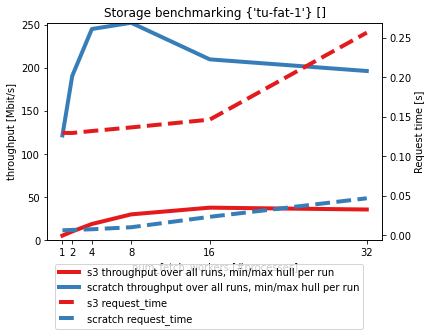

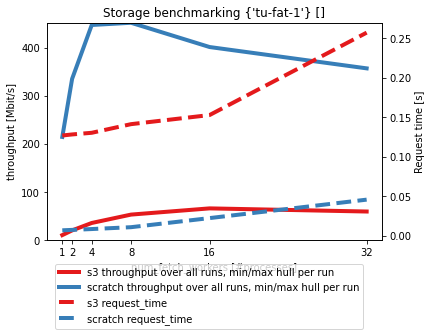

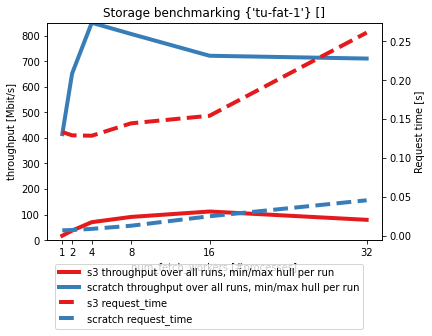

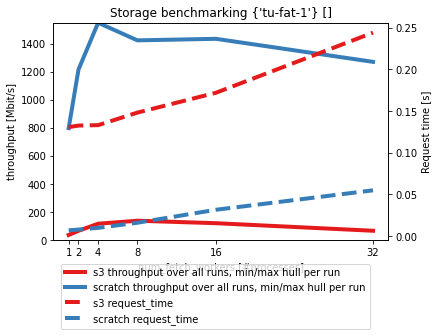

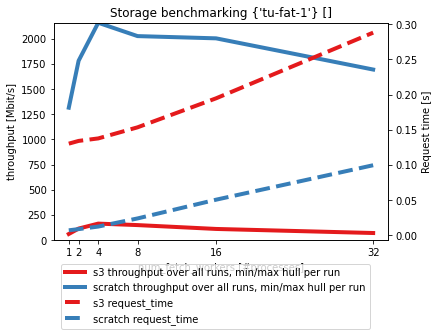

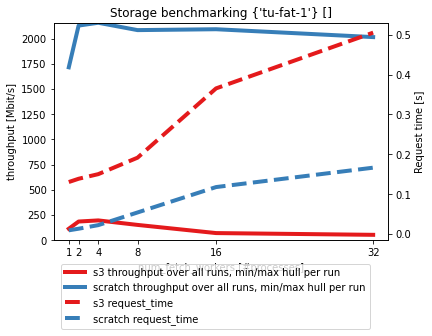

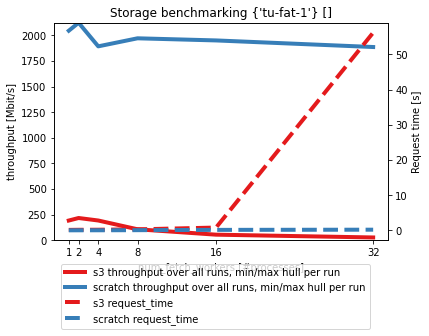

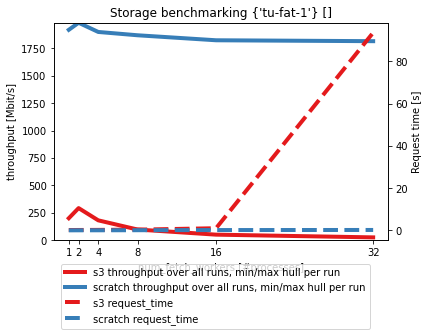

In [13]:
results_all = []
for i in [1, 2, 4, 8, 16, 32, 64, 128]:
    dfdl=df_dataloader[df_dataloader["num_workers"]==i]
    r = plot_throughput_per_storage(dfdl, group_by_dataloader)
    results_all.append(r)
#     print(r)

### NEW

In [14]:
def plot_tp(res, index):
    fig, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
    ax1=plt.subplot(1,2,1)
    ax2=plt.subplot(1,2,2)
    print(f"Len: {len(res)}")
    # results
    num_workers = []
    throughputs = []
    mrts = []
    for r in res:
        df_tp = r[index]["throughput"]
        df_mrt = r[index]["median_request_time"]
        df_tp = df_tp.reset_index(level=["dataset", "num_fetch_workers", "num_workers"])
        df_mrt = df_mrt.reset_index(level=["dataset", "num_fetch_workers", "num_workers"])
#         ax1.plot(df_tp["num_fetch_workers"], np.log(df_tp["throughput [Mbit/s]"]))
        ax2.plot(df_mrt["num_fetch_workers"], np.log(df_mrt["median_request_time"]))
        ax1.plot(df_tp["num_fetch_workers"], df_tp["throughput [Mbit/s]"])
#         ax2.plot(df_mrt["num_fetch_workers"], df_mrt["median_request_time"])
        
        ax1.set_xticks(df_tp["num_fetch_workers"])
        ax2.set_xticks(df_tp["num_fetch_workers"])

        num_workers.append(df_tp["num_workers"][0])

        ax1.set_ylabel("Throughput [Mbit/s, (log scale)]", loc="top")
        ax1.set_xlabel("Number of fetch workers", loc="center")

        ax2.set_ylabel("Median request time (log scale)]", loc="top")
        ax2.set_xlabel("Number of fetch workers", loc="center")

        ax1.grid(linestyle="--", which="both")
        ax2.grid(linestyle="--", which="both")
        throughputs.append(np.array(df_tp["throughput [Mbit/s]"]))
#         print(np.array(df_tp["throughput [Mbit/s]"]))
        mrts.append(np.array(df_mrt["median_request_time"]))

    print(num_workers)
    ax1.legend(num_workers)
    ax2.legend(num_workers)
    return throughputs, mrts

Len: 8
[1, 2, 4, 8, 16, 32, 64, 128]
Len: 8
[1, 2, 4, 8, 16, 32, 64, 128]


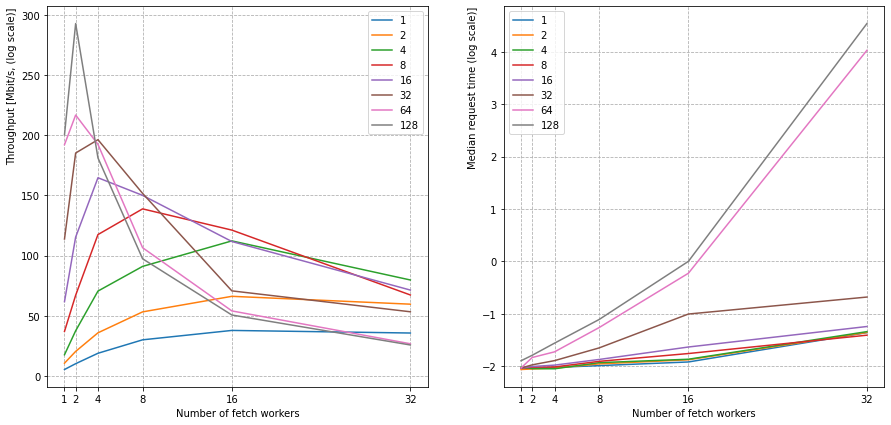

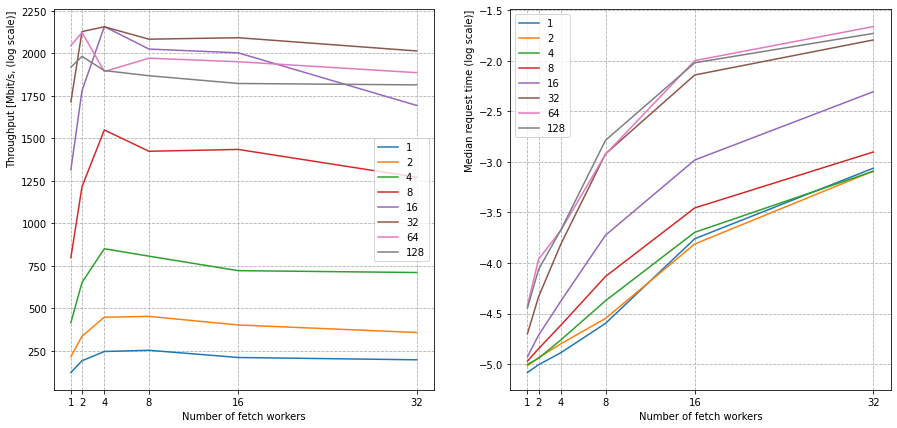

In [15]:
throughputs_s3, mrts_s3 = plot_tp(results_all, 0)
throughputs_scratch, mrts_scratch = plot_tp(results_all, 1)

In [91]:
def plot_heatmap(throughputs, mrts, params):
    plt.rcParams.update(params)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=120)
    sns.set(font_scale=1.8)
    
    sns.heatmap(throughputs, 
                     linewidth = 0.5, 
                     cmap = 'RdYlGn',
                     annot=True,
                     fmt=".2f",
                     linewidths=.5,
                     xticklabels=[1, 2, 4, 8, 16, 32], 
                     yticklabels=[1, 2, 4, 8, 16, 32, 64, 128],
                     ax=ax1).invert_yaxis()
    sns.heatmap(mrts, 
                     linewidth = 0.5, 
                     cmap = 'RdYlGn_r',
                     annot=True,
                     fmt=".2f",
                     linewidths=.5,
                     xticklabels=[1, 2, 4, 8, 16, 32], 
                     yticklabels=[1, 2, 4, 8, 16, 32, 64, 128],
                     ax=ax2).invert_yaxis()

    ax1.set_title("Throughput", fontsize=30)
    ax1.set_ylabel("Number of workers", loc="center")
    ax1.set_xlabel("Number of fetchers", loc="center")
    ax1.collections[0].colorbar.set_label("Throughput [Mbit/s] (higher is better)", fontsize="30")
    cbar1 = ax1.collections[0].colorbar
    cbar1.ax.tick_params(labelsize="30")

    ax2.set_title("Median request time", fontsize=30)
    ax2.set_ylabel("Number of workers", loc="center")
    ax2.set_xlabel("Number of fetchers", loc="center")
    ax2.collections[0].colorbar.set_label("Median request time [S] (lower is better)", fontsize="30")
    cbar2 = ax2.collections[0].colorbar
    cbar2.ax.tick_params(labelsize="30")
    return fig


S3
Scratch


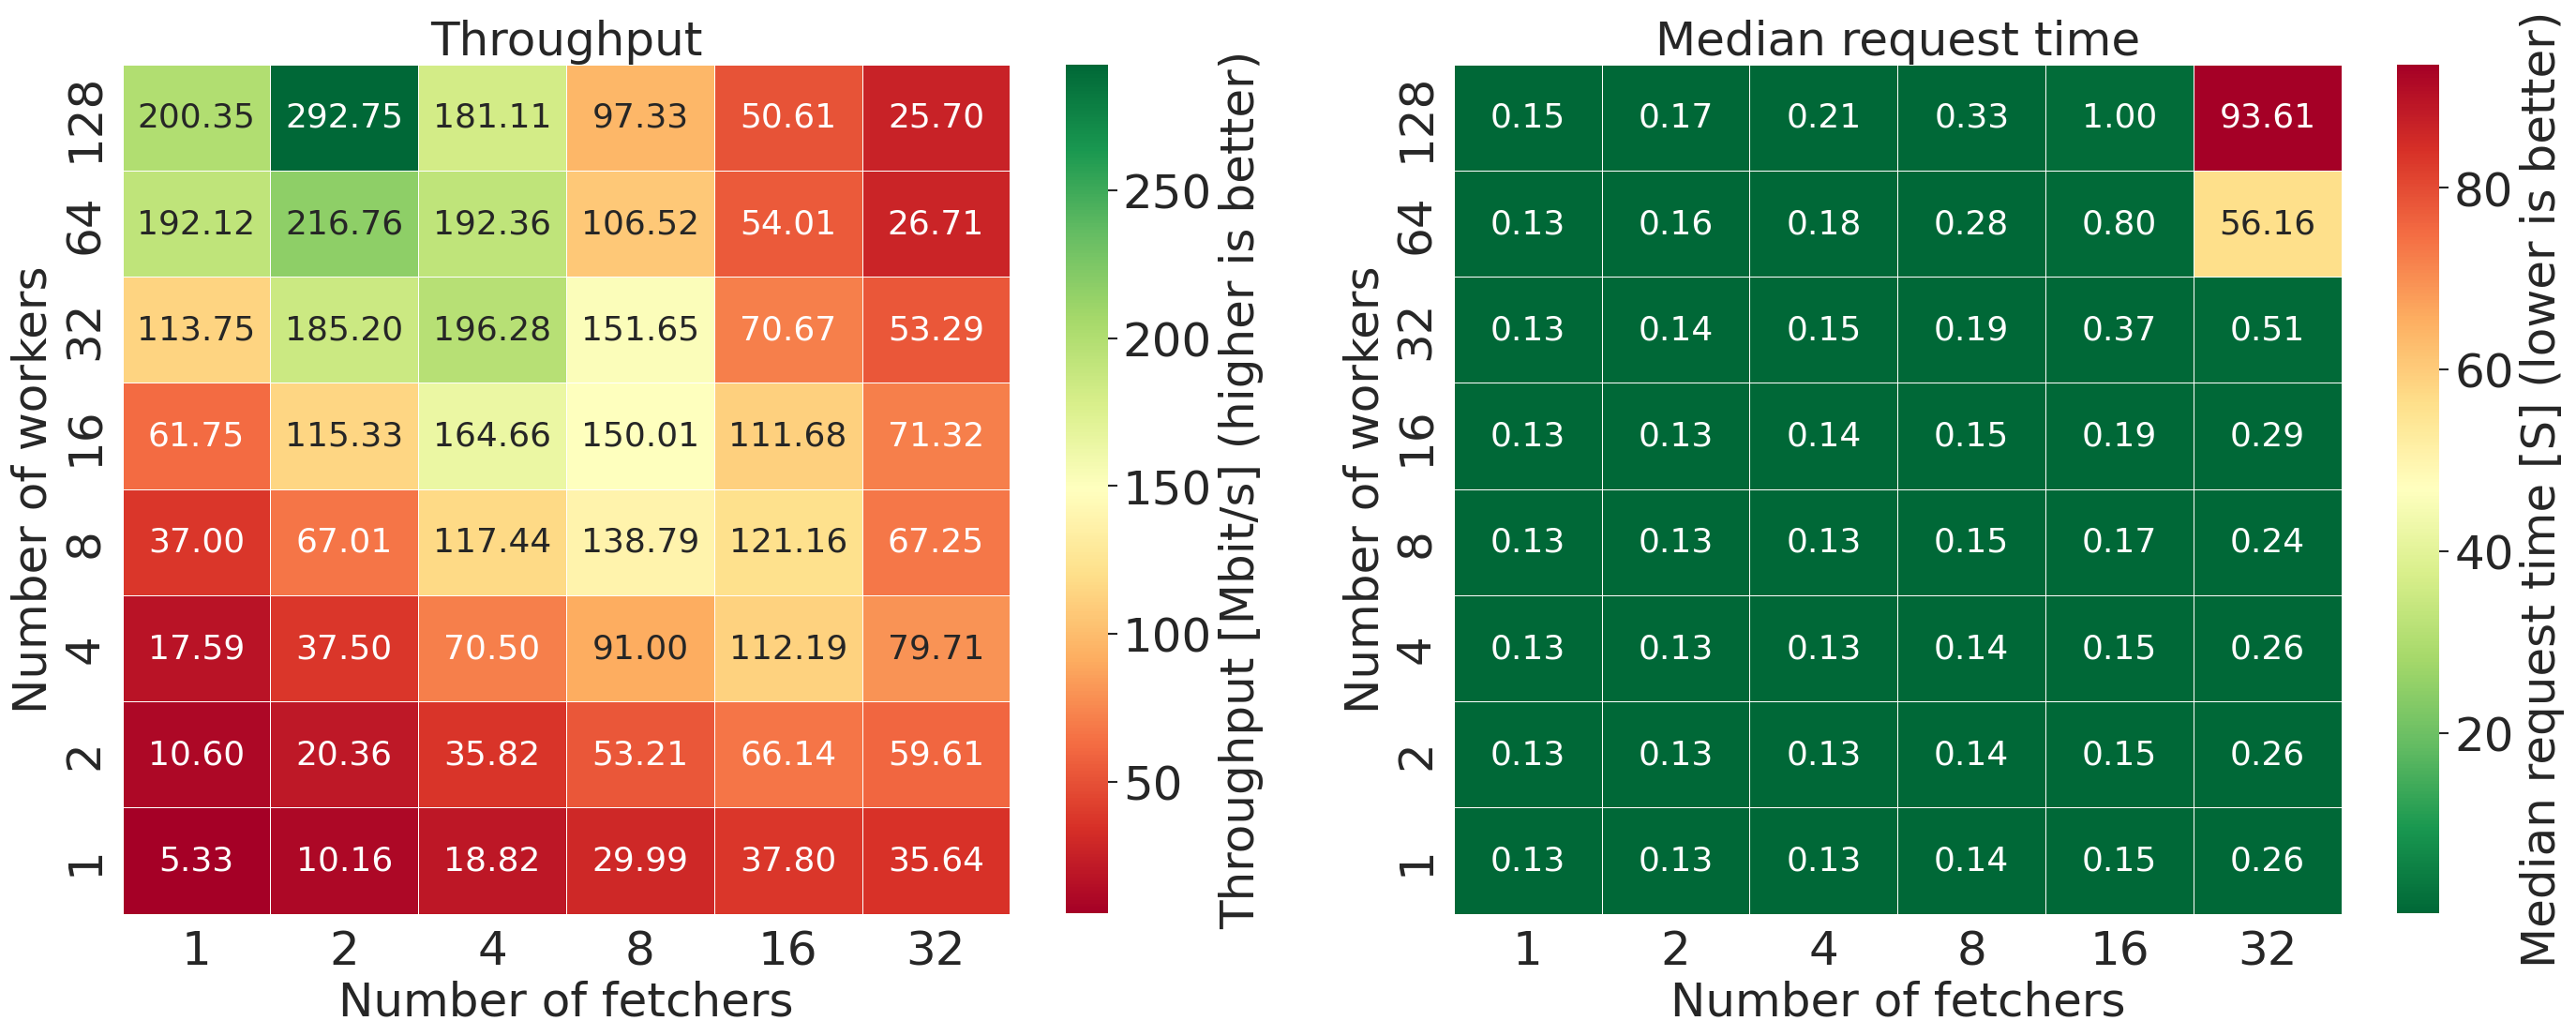

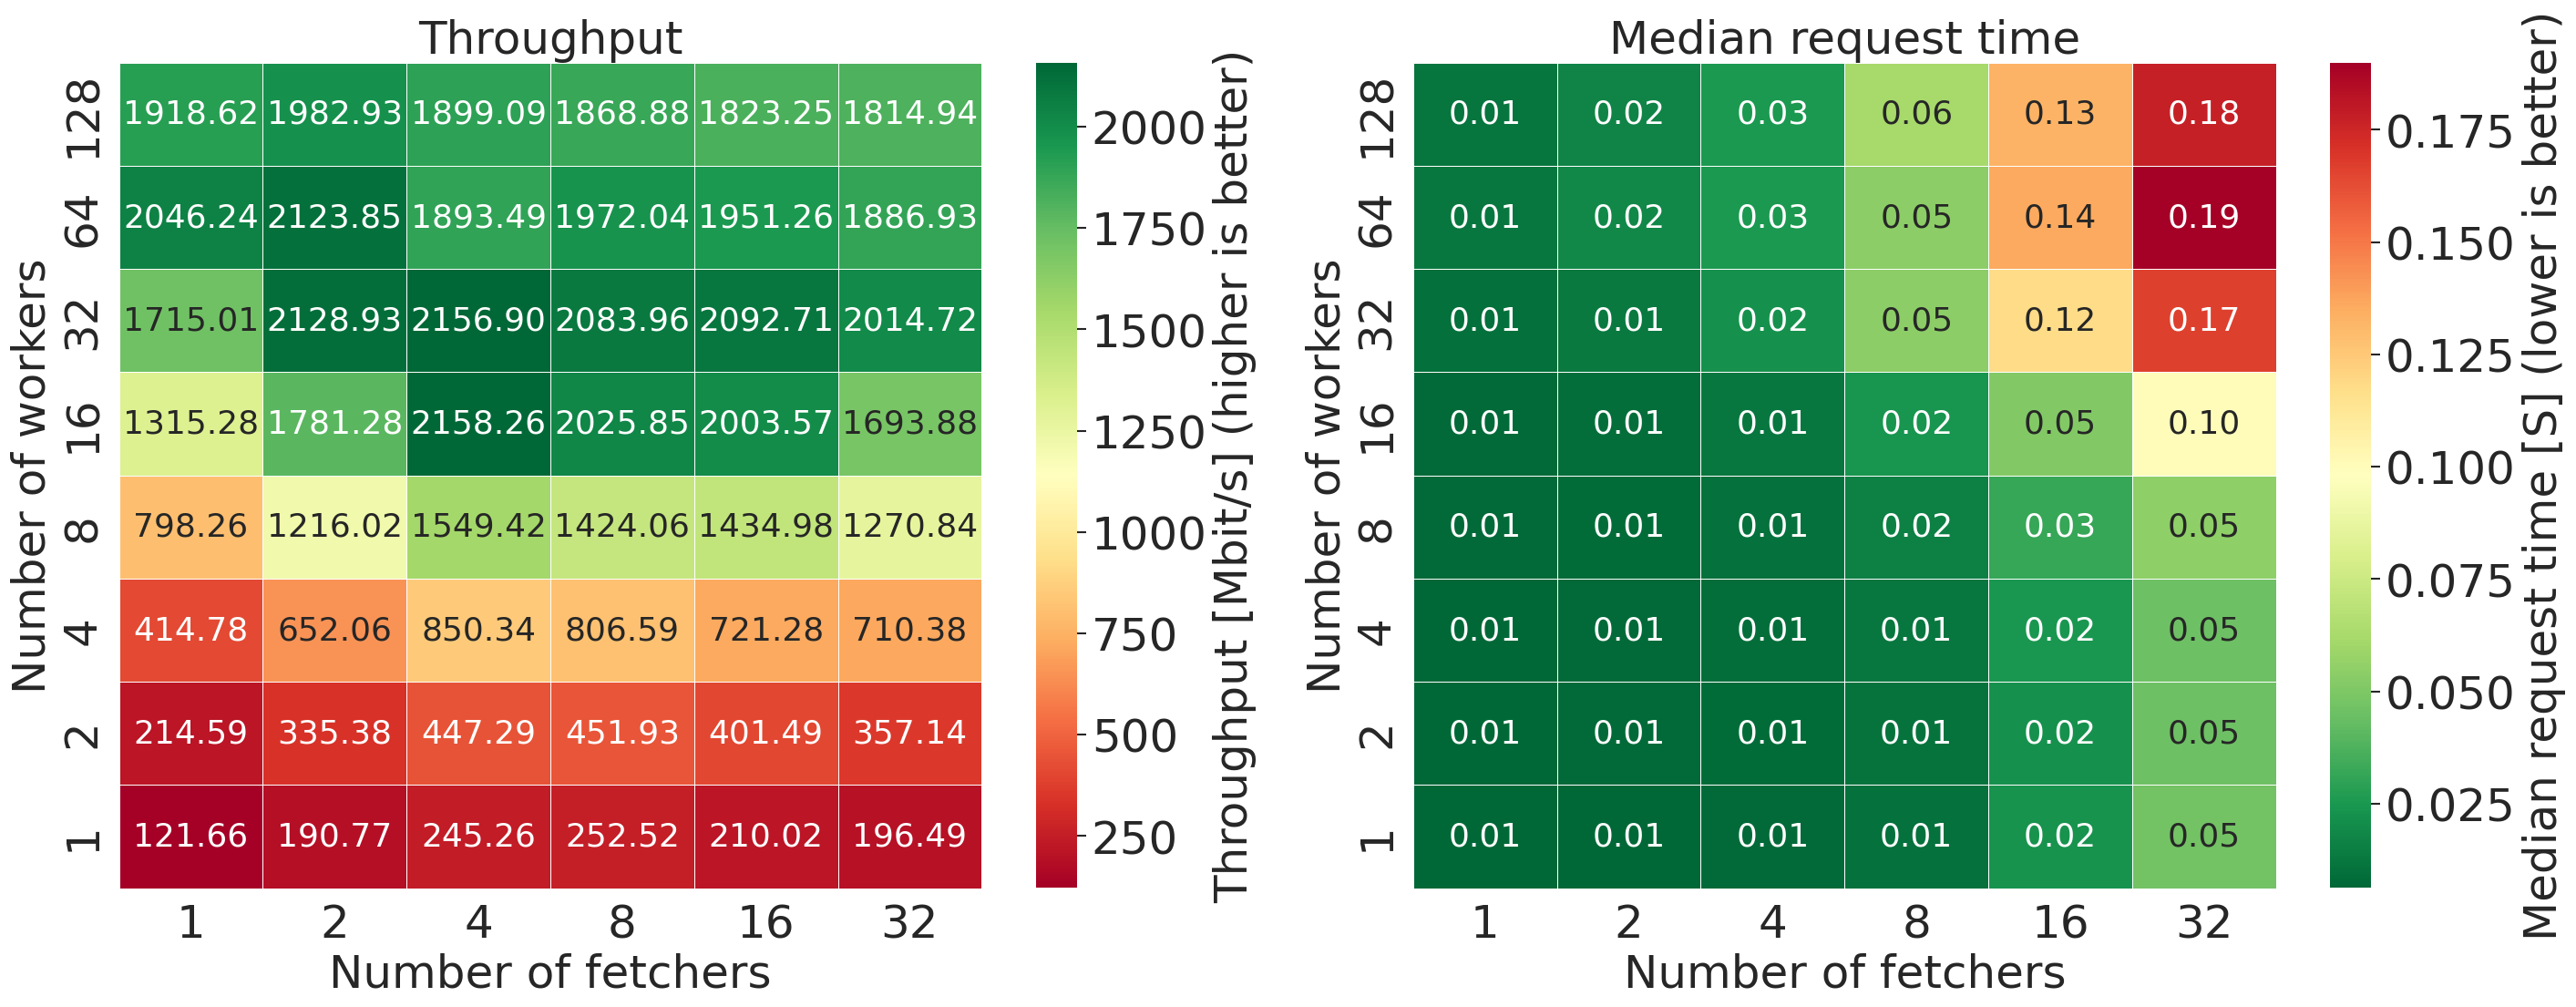

In [92]:
font_size=30
params = {'legend.fontsize': font_size,
          'figure.figsize': (28, 10),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size}

print("S3")
fig_s3 = plot_heatmap(throughputs_s3, mrts_s3, params)
fig_s3.savefig(f"dataloader_s3_throughput.pdf", bbox_inches='tight')

print("Scratch")
fig_scratch = plot_heatmap(throughputs_scratch, mrts_scratch, params)
fig_scratch.savefig(f"dataloader_scratch_throughput.pdf", bbox_inches='tight')

In [88]:
workers=np.array([1, 2, 4, 8, 16, 32])
fetchers=np.array([1, 2, 4, 8, 16, 32, 64, 128])
r = np.multiply.outer(fetchers, workers)

Text(0.5, 57.5, 'Number of fetchers')

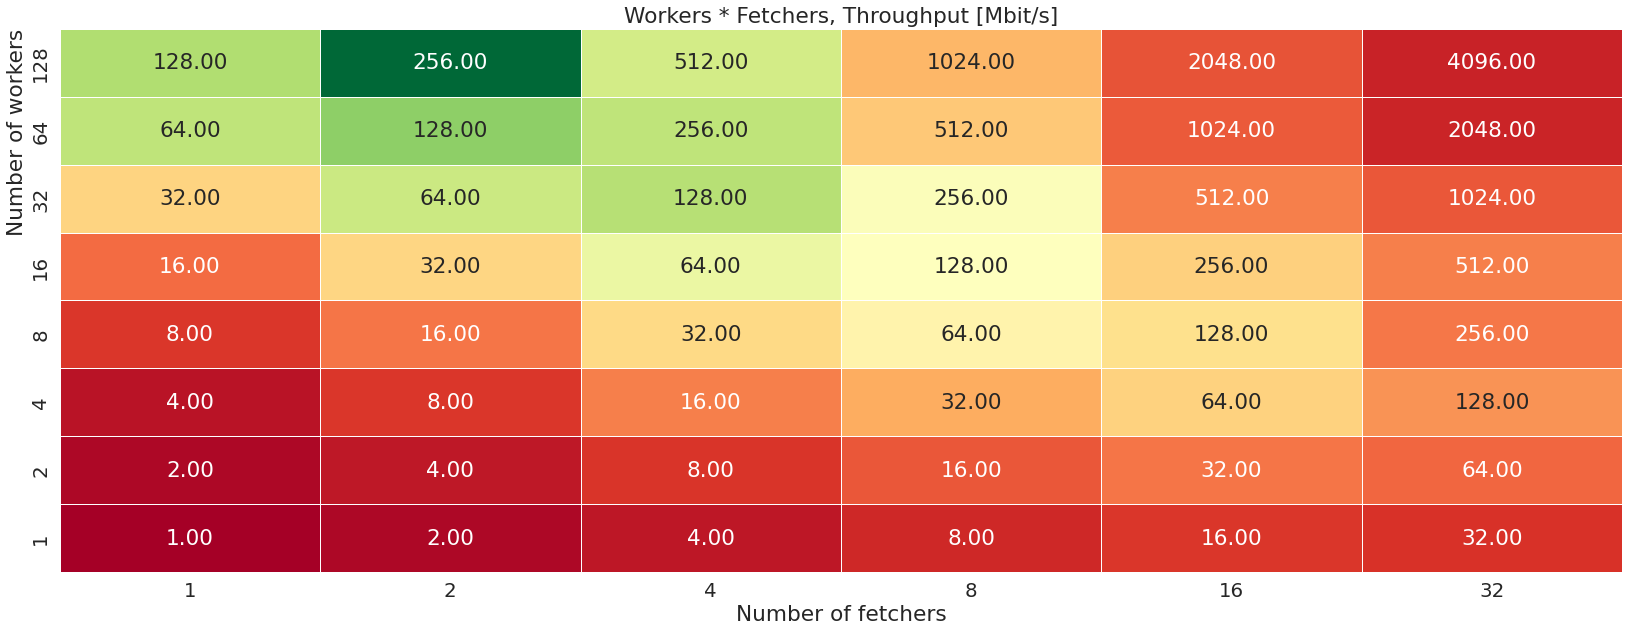

In [89]:
ax = sns.heatmap(throughputs_s3, 
             linewidth = 0.5, 
             cmap = 'RdYlGn',
             annot=r,
             fmt=".2f",
             cbar=False,
             linewidths=.5,
             xticklabels=[1, 2, 4, 8, 16, 32], 
             yticklabels=[1, 2, 4, 8, 16, 32, 64, 128]).invert_yaxis()
plt.title("Workers * Fetchers, Throughput [Mbit/s]")
plt.ylabel("Number of workers", loc="top")
plt.xlabel("Number of fetchers", loc="center")

Text(0.5, 15.0, 'Number of fetchers')

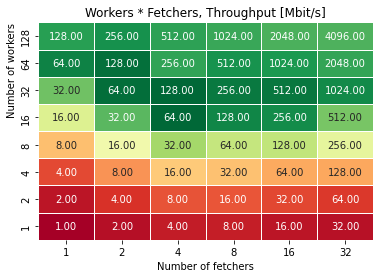

In [20]:
ax = sns.heatmap(throughputs_scratch, 
             linewidth = 0.5, 
             cmap = 'RdYlGn',
             annot=r,
             fmt=".2f",
             cbar=False,
             linewidths=.5,
             xticklabels=[1, 2, 4, 8, 16, 32], 
             yticklabels=[1, 2, 4, 8, 16, 32, 64, 128]).invert_yaxis()
plt.title("Workers * Fetchers, Throughput [Mbit/s]")
plt.ylabel("Number of workers", loc="top")
plt.xlabel("Number of fetchers", loc="center")